# Lista Aberta do Módulo 4 - Comparando Classificadores

**Regras para envio:**

1. Faça uma cópia deste arquivo
2. Deixe o arquivo aberto para qualquer pessoa com o link (Share > Anyone with the link)
3. Garanta que as saídas do notebook estão salvas (Settings > deixe desligada a opção (New notebooks use private outputs (omit outputs when saving)), e acesse o link depois em outro navegador para garantir que estão!)
4. Digite seu nome Luiz Paulo Santos Ribeiro
5. Após finalizar o exercício, poste o link (apenas o link!) no moodle. 

**Atenção**: como temos pouco tempo para o fechamento do semestre, por favor garantam que seus links estão corretos! Não teremos tempo para correções. É essencial que os alunos de ICD saibam usar o Google Colab.

## Identificação de malignidade em tumores de mama - UCI ML Breast Cancer Wisconsin (Diagnostic)

Neste trabalho você deverá realizar uma comparação entre o k-Nearest Neighbors (KNN) e o Random Forest para classificação de pacientes com tumores na mama (maligno = 1 vs benigno = 0). Para isso, usaremos o dataset de câncer de mama de UCI (já embutido no sklearn).

A avaliação dos métodos deverá ser feito usando precisão, revocação e F1. Você também deve reportar a matriz de confusão.

Você não precisa implementar os métodos, já que estão disponíveis na biblioteca scikit-learn da linguagem Python. Se necessário, pode fazer mais importações de bibliotecas.

## Importando módulos e baixando dataset

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import StratifiedKFold

In [2]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,columns =[cancer.feature_names])

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
#Para acessar as labels
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
#Pegar as colunas que serão usadas na classificação
features = df.columns

# Número de folds da validação cruzada
SPLITS = 5

Se tiver dúvidas sobre a validação cruzada, recomendo :https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e . Para regressão, vocês usaram o kfold, agora recomendo a utilização do StratifiedKFold.

# Exercício 01: 

Use o RandomForest para classificar as pacientes com e sem câncer.

Para a questão, faça as seguintes tarefas:
* Varie a o número de árvores (n_estimators) e a profundidade máxima da árvore (n_estimators). Faça pelo menos 4 configurações.
* Realize validação cruzada, com k-fold igual a 5
* Reporte a precisão, revocação, F1 e a matriz de confusão para cada configuração


In [6]:
# YOUR CODE HERE
skf = StratifiedKFold(n_splits=SPLITS)

kn = [3, 7, 11]
kd = [1, 2, 3]

y = cancer.target
x = df[features].values

F1_tf = np.zeros(9)

print("Média dos resultados via validação cruzada")
for i in range(3):
  for j in range(3):
    model = RandomForestClassifier(n_estimators=kn[i], max_depth=kd[j])

    TruePositive = 0
    FalsePositive = 0
    FalseNegative = 0
    TrueNegative = 0
    for train, test in skf.split(X=x, y=y):
      x_train, x_test = x[train,:], x[test,:]
      y_train, y_test = y[train], y[test]

      model.fit(x_train, y_train)
      prediction = model.predict(x_test)
      
      TruePositive += (y_test & prediction).sum()
      FalsePositive += (abs(y_test-1) & prediction).sum()
      FalseNegative += (y_test & abs(prediction - 1)).sum()
      TrueNegative += (abs(y_test-1) & abs(prediction - 1)).sum()
    
    precision = TruePositive / (TruePositive + FalsePositive)
    recall = TruePositive / (TruePositive + FalseNegative)

    print(kn[i], " trees, max depth", kd[j])
    print("precision: \t", precision)
    print("recall: \t", recall)

    F1_tf[i + 3*j] = 2*precision*recall / (precision + recall)
    
    print("F-score: \t", F1_tf[i + 3*j])
    print("matrix: \t", [TruePositive, FalsePositive])
    print("\t \t", [FalseNegative, TrueNegative])
    print()


Média dos resultados via validação cruzada
3  trees, max depth 1
precision: 	 0.9024390243902439
recall: 	 0.9327731092436975
F-score: 	 0.9173553719008264
matrix: 	 [333, 36]
	 	 [24, 176]

3  trees, max depth 2
precision: 	 0.9342465753424658
recall: 	 0.9551820728291317
F-score: 	 0.9445983379501386
matrix: 	 [341, 24]
	 	 [16, 188]

3  trees, max depth 3
precision: 	 0.9502762430939227
recall: 	 0.9635854341736695
F-score: 	 0.9568845618915162
matrix: 	 [344, 18]
	 	 [13, 194]

7  trees, max depth 1
precision: 	 0.916010498687664
recall: 	 0.9775910364145658
F-score: 	 0.9457994579945799
matrix: 	 [349, 32]
	 	 [8, 180]

7  trees, max depth 2
precision: 	 0.94579945799458
recall: 	 0.9775910364145658
F-score: 	 0.9614325068870523
matrix: 	 [349, 20]
	 	 [8, 192]

7  trees, max depth 3
precision: 	 0.9502762430939227
recall: 	 0.9635854341736695
F-score: 	 0.9568845618915162
matrix: 	 [344, 18]
	 	 [13, 194]

11  trees, max depth 1
precision: 	 0.9086161879895561
recall: 	 0.9747899

# Exercício 02: 

Use a knn para classificar as pacientes com e sem câncer.

Para a questão, faça as seguintes tarefas:

* Escolha e reporte resultados com 3 números de vizinhos diferentes (k)
* Realize validação cruzada, com k-fold igual a 5 (para cada um dos k vizinhos)
* Reporte a precisão, revocação, F1 e a matriz de confusão para cada configuração


In [7]:
skf = StratifiedKFold(n_splits=SPLITS)

k = [3, 7, 11]

y = cancer.target
x = df[features].values

F1_knn = []

print("Média dos resultados via validação cruzada")
for i in range(3):
  model = KNeighborsClassifier(n_neighbors=k[i])

  TruePositive = 0
  FalsePositive = 0
  FalseNegative = 0
  TrueNegative = 0
  for train, test in skf.split(X=x, y=y):
    x_train, x_test = x[train,:], x[test,:]
    y_train, y_test = y[train], y[test]

    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    
    TruePositive += (y_test & prediction).sum()
    FalsePositive += (abs(y_test-1) & prediction).sum()
    FalseNegative += (y_test & abs(prediction - 1)).sum()
    TrueNegative += (abs(y_test-1) & abs(prediction - 1)).sum()
    
  precision = TruePositive / (TruePositive + FalsePositive)
  recall = TruePositive / (TruePositive + FalseNegative)
  print(kn[i], " neighbors")
  print("precision: \t", precision)
  print("recall: \t", recall)
  F1_knn.append(2*precision*recall / (precision + recall))
  print("F-score: \t", F1_knn[i])
  print("matrix: \t", [TruePositive, FalsePositive])
  print("\t \t", [FalseNegative, TrueNegative])
  print()


Média dos resultados via validação cruzada
3  neighbors
precision: 	 0.9214092140921409
recall: 	 0.9523809523809523
F-score: 	 0.9366391184573003
matrix: 	 [340, 29]
	 	 [17, 183]

7  neighbors
precision: 	 0.9222520107238605
recall: 	 0.9635854341736695
F-score: 	 0.9424657534246577
matrix: 	 [344, 29]
	 	 [13, 183]

11  neighbors
precision: 	 0.9272237196765498
recall: 	 0.9635854341736695
F-score: 	 0.9450549450549451
matrix: 	 [344, 27]
	 	 [13, 185]



# Exercício 03: 

Compare os resultados (F1 de cada método com cada configuração) em um gráfico. Qual foi o melhor método? Houve diferença significativa com as variações de parâmetros?

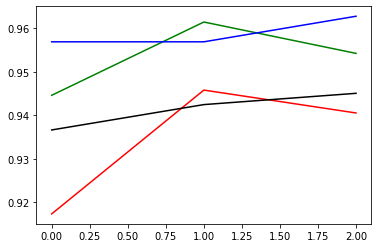

In [8]:
import matplotlib.pyplot as plt

x_knn = [1, 4, 7]

plt.plot(F1_tf[0:3], 'red') # tf maxdepth = 1, em vermelho
plt.plot(F1_tf[3:6], 'green') # tf maxdepth = 2, em verde
plt.plot(F1_tf[6:9], 'blue') # tf maxdepth = 3, em azul

plt.plot(F1_knn, 'black') # knn em preto
plt.show()

# F1_tf está dividido em três grupos, com numero de arvores variando igual aos
# k vizinhos, mas com profundidade fixa de 1 a 3

# treeforest dá resultados melhores, exceto quando profundidade maxima é 1

# Exercício 04: 

Escolha a melhor configuração/método e refaça o modelo, agora usando apenas 5 features. (Você pode selecionar aleatoriamente ou usar alguma metodologia de feature selection). O que aconteceu com a F1? Por quê?

In [17]:
skf = StratifiedKFold(n_splits=SPLITS)

y = cancer.target
x = df[features[0:5]].values
# escolhidas as 5 features iniciais, que são todas medias de algum parametro

print("Método: treeforest, 7 trees, maxdepth 3")
print("Média dos resultados via validação cruzada")
model = RandomForestClassifier(n_estimators=7, max_depth=3)

TruePositive = 0
FalsePositive = 0
FalseNegative = 0
TrueNegative = 0
for train, test in skf.split(X=x, y=y):
  x_train, x_test = x[train,:], x[test,:]
  y_train, y_test = y[train], y[test]

  model.fit(x_train, y_train)
  prediction = model.predict(x_test)
  
  TruePositive += (y_test & prediction).sum()
  FalsePositive += (abs(y_test-1) & prediction).sum()
  FalseNegative += (y_test & abs(prediction - 1)).sum()
  TrueNegative += (abs(y_test-1) & abs(prediction - 1)).sum()

precision = TruePositive / (TruePositive + FalsePositive)
recall = TruePositive / (TruePositive + FalseNegative)
print("precision: \t", precision)
print("recall: \t", recall)
print("F-score: \t", 2*precision*recall / (precision + recall))
print("matrix: \t", [TruePositive, FalsePositive])
print("\t \t", [FalseNegative, TrueNegative])

# F1 diminuiu devido a perda de precisão em função da redução nos parametros
# observados na analise

Método: treeforest, 7 trees, maxdepth 3
Média dos resultados via validação cruzada
precision: 	 0.8937823834196891
recall: 	 0.9663865546218487
F-score: 	 0.9286675639300135
matrix: 	 [345, 41]
	 	 [12, 171]
